In [1]:
# ============================================
# 🎯 TASK 2: CUSTOMER SEGMENTATION ANALYSIS
# ============================================

print("🚀 CUSTOMER SEGMENTATION ANALYSIS")
print("="*60)

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

🚀 CUSTOMER SEGMENTATION ANALYSIS
✅ Libraries imported successfully!


In [2]:
print("\n📥 STEP 1: LOADING CUSTOMER DATASET")
print("="*50)

# METHOD 1: If you uploaded to Colab
from google.colab import files
uploaded = files.upload()

# Find the uploaded file name
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# METHOD 2: If file is already in Colab
# df = pd.read_csv('your_customer_data.csv')

print(f"✅ Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n📋 Dataset Preview:")
print(df.head())

print(f"\n📊 Dataset Information:")
print(df.info())

print(f"\n🔍 Checking data quality...")
print(f"Missing values:")
print(df.isnull().sum())


📥 STEP 1: LOADING CUSTOMER DATASET


Saving customer_segmentation_data.csv to customer_segmentation_data (1).csv
✅ Dataset loaded: 1000 rows × 9 columns

📋 Dataset Preview:
   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0

In [3]:
print("\n🧹 STEP 2: DATA EXPLORATION & CLEANING")
print("="*50)

# 1. Basic statistics
print("📈 DESCRIPTIVE STATISTICS:")
print(df.describe().round(2))

print(f"\n📊 CATEGORICAL VARIABLES:")
categorical_cols = ['gender', 'preferred_category']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print(df[col].value_counts())
        print(f"Unique values: {df[col].nunique()}")

# 2. Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicate rows")

# 3. Handle missing values if any
if df.isnull().sum().sum() > 0:
    print("\n🔄 Handling missing values...")
    # Fill numeric columns with median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  • Filled {col} with median: {median_val:.2f}")

    # Fill categorical columns with mode
    for col in categorical_cols:
        if col in df.columns and df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"  • Filled {col} with mode: '{mode_val}'")
else:
    print("✅ No missing values found!")

# 4. Check for outliers
print(f"\n🔍 Checking for potential outliers...")
numeric_cols_to_check = ['age', 'income', 'spending_score', 'last_purchase_amount']
for col in numeric_cols_to_check:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        print(f"  {col}: {outliers} potential outliers ({outliers/len(df)*100:.1f}%)")

print(f"\n✅ Data cleaning completed!")
print(f"Final dataset shape: {df.shape}")


🧹 STEP 2: DATA EXPLORATION & CLEANING
📈 DESCRIPTIVE STATISTICS:
            id      age     income  spending_score  membership_years  \
count  1000.00  1000.00    1000.00         1000.00           1000.00   
mean    500.50    43.78   88500.80           50.68              5.47   
std     288.82    15.04   34230.77           28.96              2.86   
min       1.00    18.00   30004.00            1.00              1.00   
25%     250.75    30.00   57911.75           26.00              3.00   
50%     500.50    45.00   87845.50           50.00              5.00   
75%     750.25    57.00  116110.25           76.00              8.00   
max    1000.00    69.00  149973.00          100.00             10.00   

       purchase_frequency  last_purchase_amount  
count             1000.00               1000.00  
mean                26.60                492.35  
std                 14.24                295.74  
min                  1.00                 10.40  
25%                 15.00           


📊 STEP 3: EXPLORATORY DATA ANALYSIS (EDA)


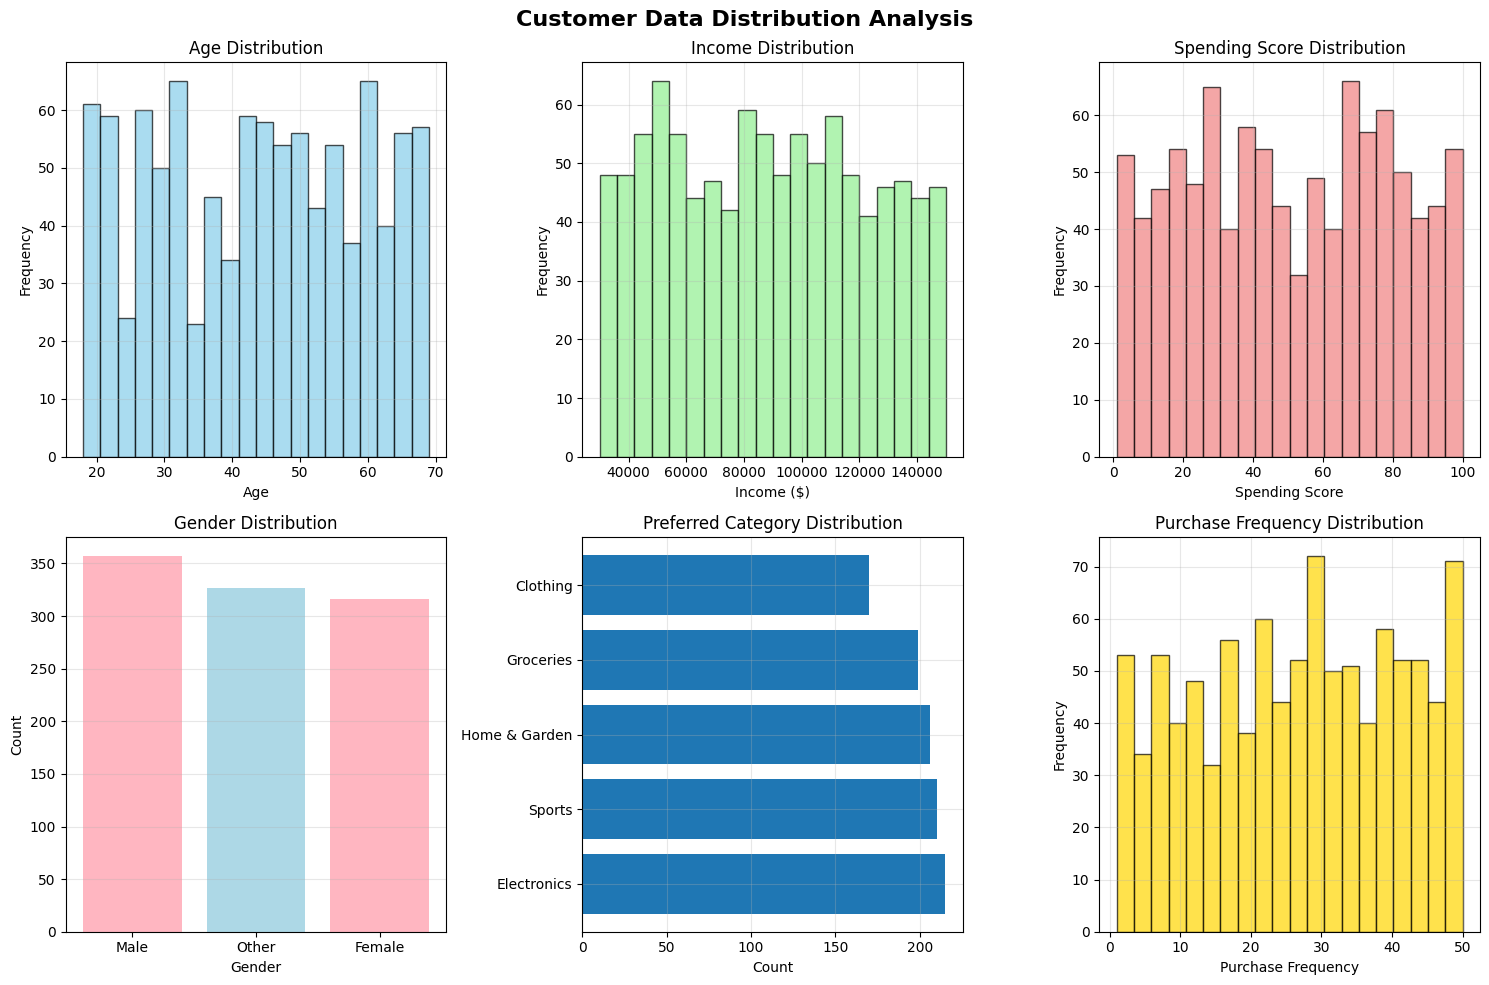


📈 CORRELATION ANALYSIS:


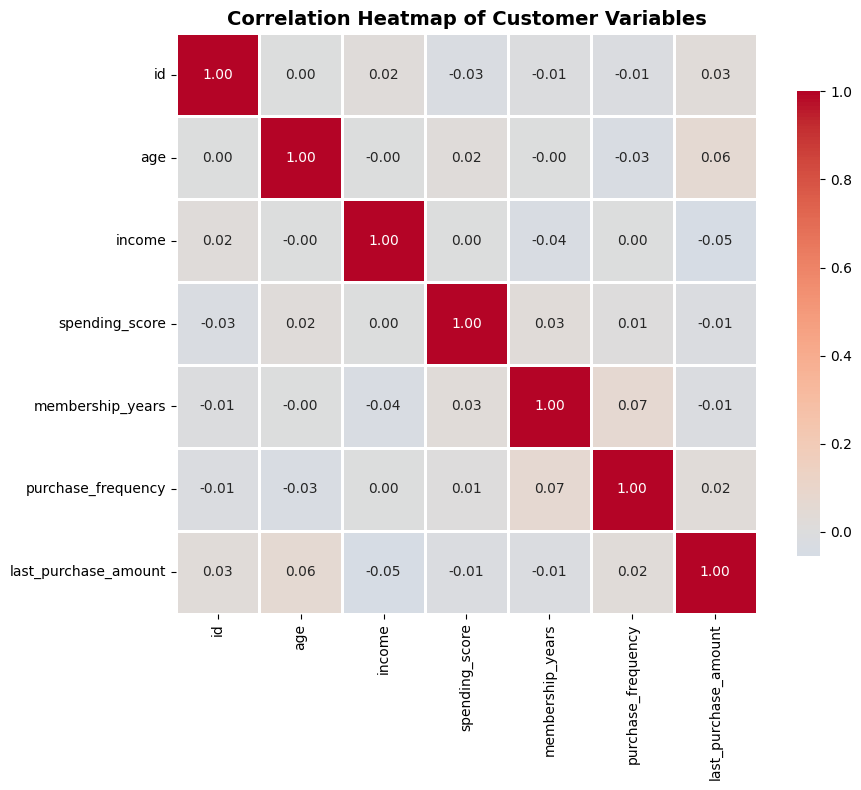


🔗 STRONG CORRELATIONS (|r| > 0.5):


In [4]:
print("\n📊 STEP 3: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50)

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Customer Data Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Age distribution
if 'age' in df.columns:
    axes[0, 0].hist(df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Age Distribution', fontsize=12)
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)

# 2. Income distribution
if 'income' in df.columns:
    axes[0, 1].hist(df['income'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Income Distribution', fontsize=12)
    axes[0, 1].set_xlabel('Income ($)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)

# 3. Spending score distribution
if 'spending_score' in df.columns:
    axes[0, 2].hist(df['spending_score'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[0, 2].set_title('Spending Score Distribution', fontsize=12)
    axes[0, 2].set_xlabel('Spending Score')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].grid(True, alpha=0.3)

# 4. Gender distribution
if 'gender' in df.columns:
    gender_counts = df['gender'].value_counts()
    axes[1, 0].bar(gender_counts.index, gender_counts.values, color=['lightpink', 'lightblue'])
    axes[1, 0].set_title('Gender Distribution', fontsize=12)
    axes[1, 0].set_xlabel('Gender')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. Preferred category distribution
if 'preferred_category' in df.columns:
    category_counts = df['preferred_category'].value_counts()
    axes[1, 1].barh(range(len(category_counts)), category_counts.values)
    axes[1, 1].set_yticks(range(len(category_counts)))
    axes[1, 1].set_yticklabels(category_counts.index)
    axes[1, 1].set_title('Preferred Category Distribution', fontsize=12)
    axes[1, 1].set_xlabel('Count')
    axes[1, 1].grid(True, alpha=0.3)

# 6. Purchase frequency distribution
if 'purchase_frequency' in df.columns:
    axes[1, 2].hist(df['purchase_frequency'], bins=20, color='gold', edgecolor='black', alpha=0.7)
    axes[1, 2].set_title('Purchase Frequency Distribution', fontsize=12)
    axes[1, 2].set_xlabel('Purchase Frequency')
    axes[1, 2].set_ylabel('Frequency')
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis
print("\n📈 CORRELATION ANALYSIS:")
numeric_df = df.select_dtypes(include=[np.number])
if len(numeric_df.columns) > 1:
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
    plt.title('Correlation Heatmap of Customer Variables', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Highlight strong correlations
    print("\n🔗 STRONG CORRELATIONS (|r| > 0.5):")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:
                print(f"  • {correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.2f}")

In [5]:
print("\n🔢 STEP 4: FEATURE ENGINEERING FOR CLUSTERING")
print("="*50)

# Create a copy for clustering
df_cluster = df.copy()

print("🔄 Preparing features for clustering...")

# Select features for clustering
# We'll use behavioral and demographic features
clustering_features = []

# 1. Demographic features
if 'age' in df_cluster.columns:
    clustering_features.append('age')
if 'income' in df_cluster.columns:
    clustering_features.append('income')

# 2. Behavioral features
if 'spending_score' in df_cluster.columns:
    clustering_features.append('spending_score')
if 'purchase_frequency' in df_cluster.columns:
    clustering_features.append('purchase_frequency')
if 'last_purchase_amount' in df_cluster.columns:
    clustering_features.append('last_purchase_amount')

# 3. Loyalty feature
if 'membership_years' in df_cluster.columns:
    clustering_features.append('membership_years')

print(f"✅ Selected {len(clustering_features)} features for clustering:")
for i, feature in enumerate(clustering_features, 1):
    print(f"  {i}. {feature}")

# Prepare the data
X = df_cluster[clustering_features].copy()

# Check for any infinite or NaN values
print(f"\n🔍 Data quality check:")
print(f"  Infinite values: {np.isinf(X.values).sum()}")
print(f"  NaN values: {X.isnull().sum().sum()}")

# Handle any remaining NaN values
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())
    print("  ✅ Filled NaN values with median")

# Scale the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n✅ Features prepared for clustering:")
print(f"  Original shape: {X.shape}")
print(f"  Scaled shape: {X_scaled.shape}")


🔢 STEP 4: FEATURE ENGINEERING FOR CLUSTERING
🔄 Preparing features for clustering...
✅ Selected 6 features for clustering:
  1. age
  2. income
  3. spending_score
  4. purchase_frequency
  5. last_purchase_amount
  6. membership_years

🔍 Data quality check:
  Infinite values: 0
  NaN values: 0

✅ Features prepared for clustering:
  Original shape: (1000, 6)
  Scaled shape: (1000, 6)



🎯 STEP 5: FINDING OPTIMAL NUMBER OF CLUSTERS (SIMPLE VERSION)
🔄 Testing different cluster counts...
  k=3: Silhouette Score = 0.121
  k=4: Silhouette Score = 0.127
  k=5: Silhouette Score = 0.132
  k=6: Silhouette Score = 0.138

✅ Optimal number of clusters: 6 (Silhouette Score: 0.138)


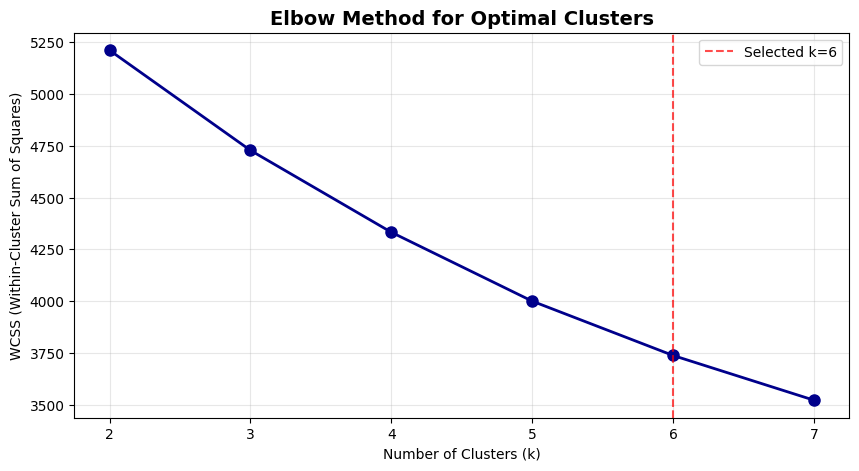

In [8]:
print("\n🎯 STEP 5: FINDING OPTIMAL NUMBER OF CLUSTERS (SIMPLE VERSION)")
print("="*50)

# Simple approach: Test 3-6 clusters and pick the best
print("🔄 Testing different cluster counts...")

best_score = -1
best_k = 3

for k in range(3, 7):  # Test 3, 4, 5, 6 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    print(f"  k={k}: Silhouette Score = {score:.3f}")

    if score > best_score:
        best_score = score
        best_k = k

optimal_k = best_k
print(f"\n✅ Optimal number of clusters: {optimal_k} (Silhouette Score: {best_score:.3f})")

# Visualization
wcss = []
k_values = list(range(2, 8))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o', linewidth=2, markersize=8, color='darkblue')
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Selected k={optimal_k}')
plt.title('Elbow Method for Optimal Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
print("\n🔮 STEP 6: APPLYING K-MEANS CLUSTERING")
print("="*50)

print(f"🔄 Applying K-Means with {optimal_k} clusters...")

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df_cluster['Cluster'] = clusters
df_cluster['Segment'] = 'Segment_' + (clusters + 1).astype(str)

print(f"✅ Clustering completed!")
print(f"\n📊 Cluster Distribution:")
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = (count / len(df_cluster)) * 100
    print(f"  Cluster {cluster}: {count} customers ({percentage:.1f}%)")

# Calculate silhouette score for final model
final_silhouette = silhouette_score(X_scaled, clusters)
print(f"\n📈 Model Performance:")
print(f"  • Silhouette Score: {final_silhouette:.3f}")
print(f"  • WCSS (Inertia): {kmeans.inertia_:.2f}")


🔮 STEP 6: APPLYING K-MEANS CLUSTERING
🔄 Applying K-Means with 6 clusters...
✅ Clustering completed!

📊 Cluster Distribution:
  Cluster 0: 165 customers (16.5%)
  Cluster 1: 165 customers (16.5%)
  Cluster 2: 171 customers (17.1%)
  Cluster 3: 187 customers (18.7%)
  Cluster 4: 143 customers (14.3%)
  Cluster 5: 169 customers (16.9%)

📈 Model Performance:
  • Silhouette Score: 0.138
  • WCSS (Inertia): 3737.99


In [10]:
print("\n📊 STEP 7: ANALYZING CLUSTER CHARACTERISTICS")
print("="*50)

print("🔍 Analyzing each cluster profile...")

# Analyze cluster centers (in original scale)
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)

# Create a DataFrame for cluster centers
centers_df = pd.DataFrame(cluster_centers_original, columns=clustering_features)
centers_df['Cluster'] = range(optimal_k)
centers_df['Customer_Count'] = cluster_counts.values

print("\n📈 CLUSTER CENTERS (Average values):")
print(centers_df.round(2))

# Analyze each cluster in detail
print("\n" + "="*60)
print("👥 DETAILED CLUSTER PROFILES")
print("="*60)

# Create meaningful segment names based on characteristics
segment_names = {}
for cluster in range(optimal_k):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]

    # Calculate key metrics
    avg_income = cluster_data['income'].mean() if 'income' in cluster_data.columns else 0
    avg_spending = cluster_data['spending_score'].mean() if 'spending_score' in cluster_data.columns else 0
    avg_frequency = cluster_data['purchase_frequency'].mean() if 'purchase_frequency' in cluster_data.columns else 0

    # Assign segment name based on characteristics
    if avg_income > df_cluster['income'].mean() and avg_spending > df_cluster['spending_score'].mean():
        segment_name = "High Value Elite"
    elif avg_income > df_cluster['income'].mean() and avg_spending < df_cluster['spending_score'].mean():
        segment_name = "Affluent Conservative"
    elif avg_income < df_cluster['income'].mean() and avg_spending > df_cluster['spending_score'].mean():
        segment_name = "Enthusiastic Shoppers"
    elif avg_frequency > df_cluster['purchase_frequency'].mean():
        segment_name = "Frequent Buyers"
    else:
        segment_name = "Occasional Shoppers"

    segment_names[cluster] = segment_name

    print(f"\n📊 CLUSTER {cluster} - {segment_name}:")
    print(f"  • Size: {len(cluster_data)} customers ({len(cluster_data)/len(df_cluster)*100:.1f}%)")

    # Demographics
    if 'age' in cluster_data.columns:
        print(f"  • Average Age: {cluster_data['age'].mean():.1f} years")
    if 'gender' in cluster_data.columns:
        gender_dist = cluster_data['gender'].value_counts(normalize=True) * 100
        for gender, percentage in gender_dist.items():
            print(f"  • {gender}: {percentage:.1f}%")

    # Financial & Behavioral
    if 'income' in cluster_data.columns:
        print(f"  • Average Income: ${cluster_data['income'].mean():,.0f}")
    if 'spending_score' in cluster_data.columns:
        print(f"  • Average Spending Score: {cluster_data['spending_score'].mean():.1f}")
    if 'purchase_frequency' in cluster_data.columns:
        print(f"  • Purchase Frequency: {cluster_data['purchase_frequency'].mean():.1f}")
    if 'last_purchase_amount' in cluster_data.columns:
        print(f"  • Last Purchase: ${cluster_data['last_purchase_amount'].mean():.2f}")

    # Loyalty
    if 'membership_years' in cluster_data.columns:
        print(f"  • Membership Years: {cluster_data['membership_years'].mean():.1f}")

    # Preferences
    if 'preferred_category' in cluster_data.columns:
        top_category = cluster_data['preferred_category'].mode()[0] if len(cluster_data['preferred_category'].mode()) > 0 else 'N/A'
        print(f"  • Preferred Category: {top_category}")

# Add segment names to dataframe
df_cluster['Segment_Name'] = df_cluster['Cluster'].map(segment_names)


📊 STEP 7: ANALYZING CLUSTER CHARACTERISTICS
🔍 Analyzing each cluster profile...

📈 CLUSTER CENTERS (Average values):
     age     income  spending_score  purchase_frequency  last_purchase_amount  \
0  57.38  119929.81           47.69               24.33                352.68   
1  47.14   66991.82           57.28               15.12                293.75   
2  53.96   56446.99           46.47               32.60                733.72   
3  29.64   86105.61           50.13               36.42                245.23   
4  30.22   92183.17           42.89               13.79                661.15   
5  44.07  110783.15           58.64               33.91                708.98   

   membership_years  Cluster  Customer_Count  
0              3.47        0             165  
1              7.56        1             165  
2              4.64        2             171  
3              5.13        3             187  
4              3.55        4             143  
5              8.22        5    


📈 STEP 8: VISUALIZING CUSTOMER SEGMENTS
🎨 Creating segmentation visualizations...


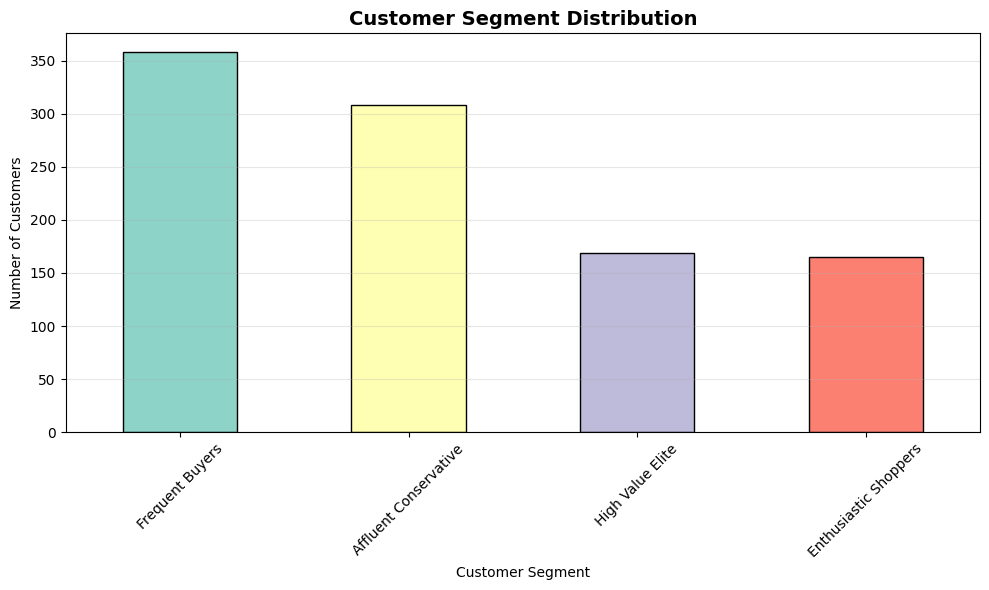

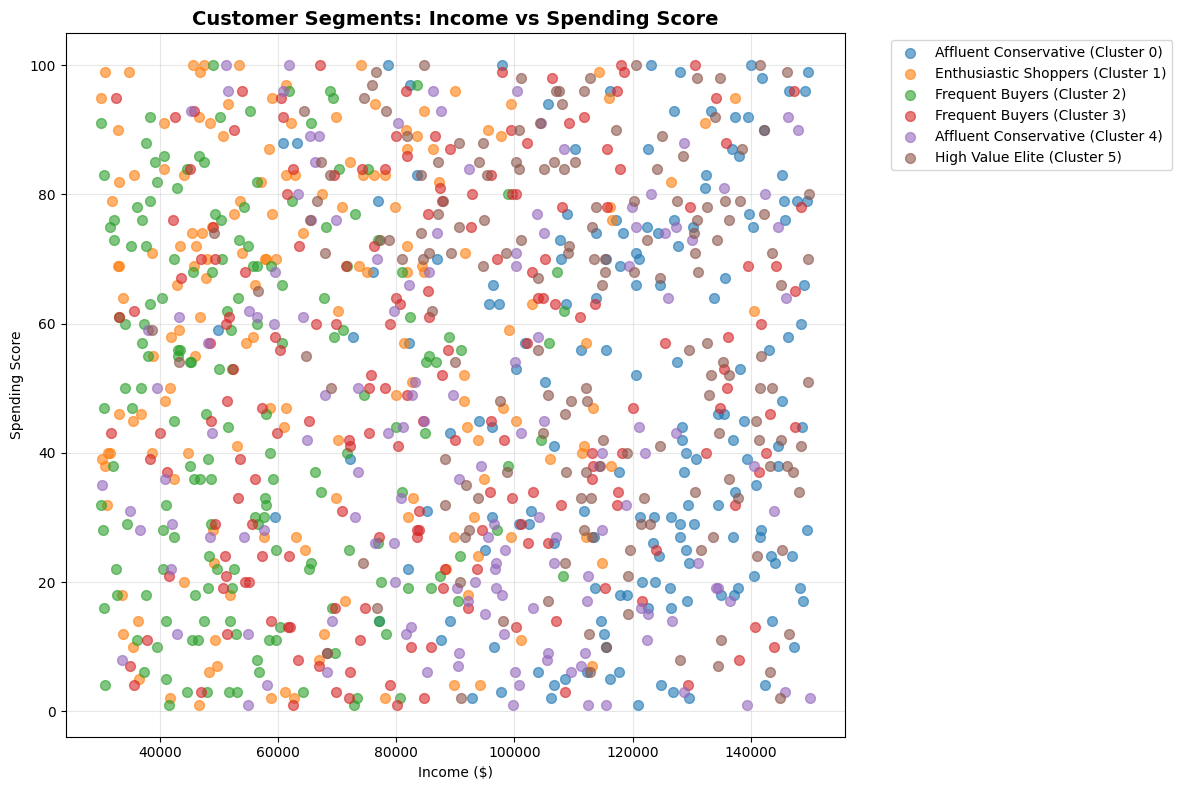

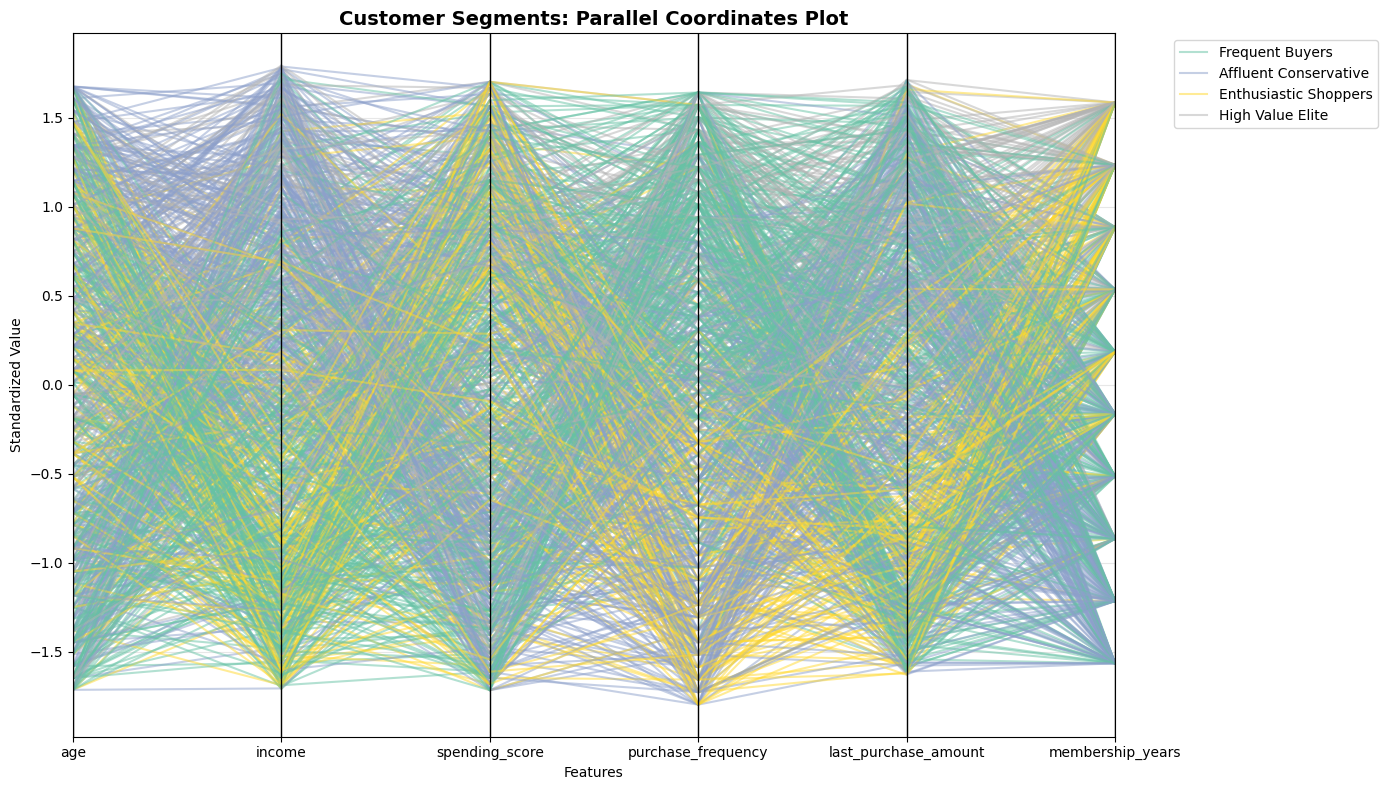

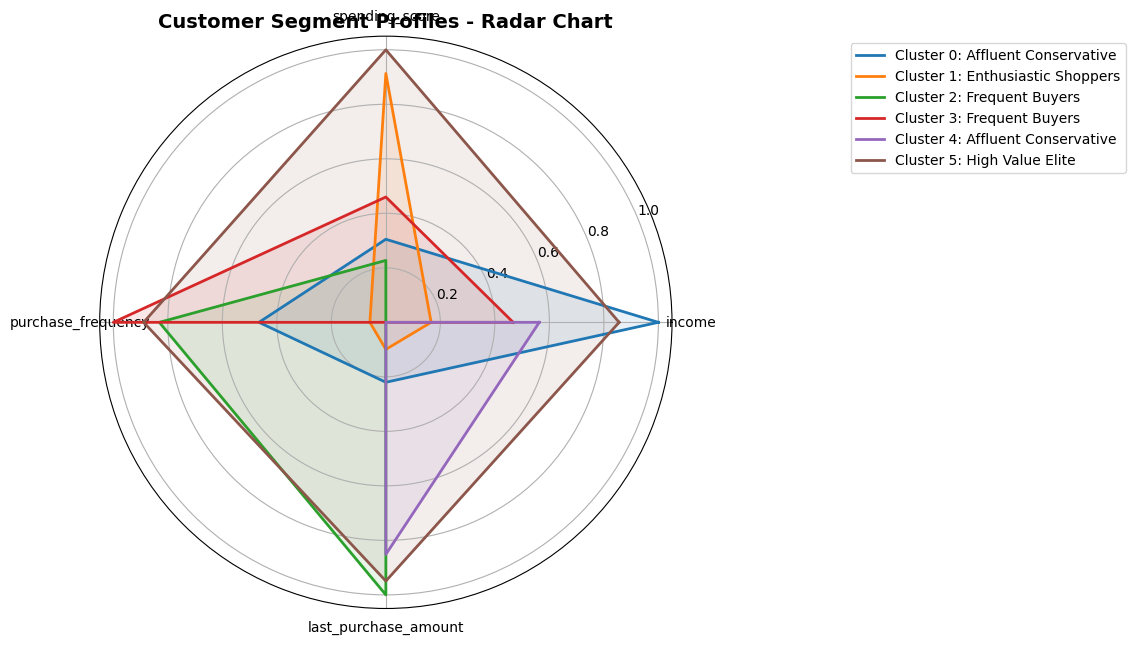

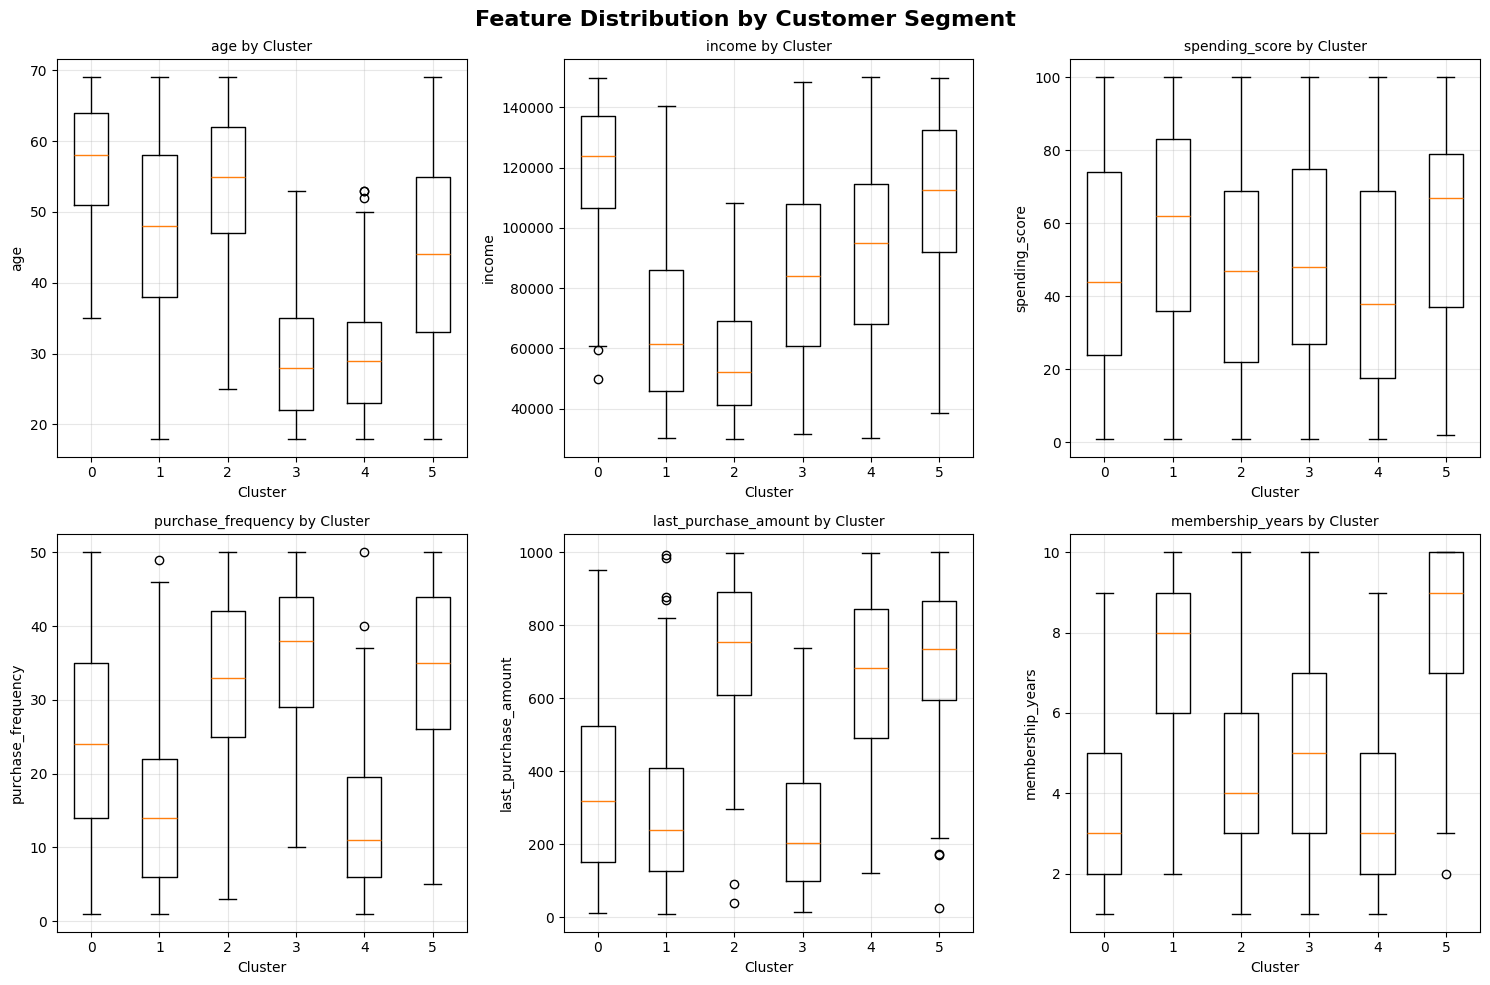

In [11]:
print("\n📈 STEP 8: VISUALIZING CUSTOMER SEGMENTS")
print("="*50)

print("🎨 Creating segmentation visualizations...")

# 1. Cluster distribution
plt.figure(figsize=(10, 6))
segment_counts = df_cluster['Segment_Name'].value_counts()
colors = plt.cm.Set3(np.arange(len(segment_counts)))
segment_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Customer Segment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 2. Income vs Spending Score by Cluster
if 'income' in df_cluster.columns and 'spending_score' in df_cluster.columns:
    plt.figure(figsize=(12, 8))

    for cluster in range(optimal_k):
        cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
        plt.scatter(cluster_data['income'], cluster_data['spending_score'],
                   label=f'{segment_names[cluster]} (Cluster {cluster})',
                   alpha=0.6, s=50)

    plt.title('Customer Segments: Income vs Spending Score', fontsize=14, fontweight='bold')
    plt.xlabel('Income ($)')
    plt.ylabel('Spending Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 3. Parallel Coordinates Plot (for multivariate visualization)
try:
    from pandas.plotting import parallel_coordinates

    # Prepare data for parallel coordinates
    parallel_data = df_cluster[clustering_features + ['Segment_Name']].copy()

    # Scale for better visualization
    for col in clustering_features:
        if parallel_data[col].std() > 0:
            parallel_data[col] = (parallel_data[col] - parallel_data[col].mean()) / parallel_data[col].std()

    plt.figure(figsize=(14, 8))
    parallel_coordinates(parallel_data, 'Segment_Name', colormap='Set2', alpha=0.5)
    plt.title('Customer Segments: Parallel Coordinates Plot', fontsize=14, fontweight='bold')
    plt.xlabel('Features')
    plt.ylabel('Standardized Value')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"⚠️ Parallel coordinates not available: {e}")

# 4. Radar chart for cluster profiles
try:
    # Prepare data for radar chart
    features_for_radar = ['income', 'spending_score', 'purchase_frequency', 'last_purchase_amount']
    features_for_radar = [f for f in features_for_radar if f in clustering_features]

    if len(features_for_radar) >= 3:
        # Calculate average values for each cluster
        radar_data = []
        for cluster in range(optimal_k):
            cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
            cluster_means = [cluster_data[feature].mean() for feature in features_for_radar]
            radar_data.append(cluster_means)

        # Normalize for radar chart
        radar_data = np.array(radar_data)
        radar_data_norm = (radar_data - radar_data.min(axis=0)) / (radar_data.max(axis=0) - radar_data.min(axis=0))

        # Plot radar chart
        angles = np.linspace(0, 2 * np.pi, len(features_for_radar), endpoint=False).tolist()
        angles += angles[:1]  # Close the polygon

        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))

        for cluster in range(optimal_k):
            values = radar_data_norm[cluster].tolist()
            values += values[:1]  # Close the polygon
            ax.plot(angles, values, linewidth=2, label=f'Cluster {cluster}: {segment_names[cluster]}')
            ax.fill(angles, values, alpha=0.1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features_for_radar)
        ax.set_title('Customer Segment Profiles - Radar Chart', fontsize=14, fontweight='bold')
        ax.legend(bbox_to_anchor=(1.3, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"⚠️ Radar chart not available: {e}")

# 5. Box plots for each feature by cluster
if len(clustering_features) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Feature Distribution by Customer Segment', fontsize=16, fontweight='bold')

    features_to_plot = clustering_features[:6]  # Plot first 6 features
    for idx, feature in enumerate(features_to_plot):
        row = idx // 3
        col = idx % 3

        # Create box plot data for each cluster
        box_data = []
        for cluster in range(optimal_k):
            box_data.append(df_cluster[df_cluster['Cluster'] == cluster][feature])

        axes[row, col].boxplot(box_data)
        axes[row, col].set_title(f'{feature} by Cluster', fontsize=10)
        axes[row, col].set_xlabel('Cluster')
        axes[row, col].set_ylabel(feature)
        axes[row, col].set_xticks(range(1, optimal_k + 1))
        axes[row, col].set_xticklabels(range(optimal_k))
        axes[row, col].grid(True, alpha=0.3)

    # Remove empty subplots if any
    for idx in range(len(features_to_plot), 6):
        row = idx // 3
        col = idx % 3
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

In [12]:
print("\n💡 STEP 9: ACTIONABLE INSIGHTS & RECOMMENDATIONS")
print("="*60)

# Calculate overall metrics
total_customers = len(df_cluster)
total_segments = optimal_k

print(f"\n📊 OVERALL ANALYSIS SUMMARY:")
print(f"  • Total Customers Analyzed: {total_customers}")
print(f"  • Segments Identified: {total_segments}")
print(f"  • Average Customers per Segment: {total_customers/total_segments:.1f}")

# Calculate segment value
if 'income' in df_cluster.columns:
    avg_income_by_segment = df_cluster.groupby('Segment_Name')['income'].mean().sort_values(ascending=False)
    print(f"\n💰 SEGMENT VALUE ANALYSIS:")
    for segment, income in avg_income_by_segment.items():
        segment_size = len(df_cluster[df_cluster['Segment_Name'] == segment])
        print(f"  • {segment}: ${income:,.0f} avg income ({segment_size} customers)")

print(f"\n🎯 KEY INSIGHTS:")

# Insight 1: Identify high-value segments
high_value_segments = []
for cluster in range(optimal_k):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    if 'income' in cluster_data.columns and 'spending_score' in cluster_data.columns:
        if (cluster_data['income'].mean() > df_cluster['income'].mean() and
            cluster_data['spending_score'].mean() > df_cluster['spending_score'].mean()):
            high_value_segments.append(segment_names[cluster])

if high_value_segments:
    print(f"1. 🏆 HIGH-VALUE SEGMENTS: {', '.join(high_value_segments)}")
    print(f"   • These customers have above-average income AND spending score")
    print(f"   • Focus retention efforts here")

# Insight 2: Identify at-risk segments
at_risk_segments = []
for cluster in range(optimal_k):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    if 'purchase_frequency' in cluster_data.columns and 'spending_score' in cluster_data.columns:
        if (cluster_data['purchase_frequency'].mean() < df_cluster['purchase_frequency'].mean() * 0.5 and
            cluster_data['spending_score'].mean() < df_cluster['spending_score'].mean()):
            at_risk_segments.append(segment_names[cluster])

if at_risk_segments:
    print(f"\n2. ⚠️ AT-RISK SEGMENTS: {', '.join(at_risk_segments)}")
    print(f"   • Low purchase frequency and spending score")
    print(f"   • Need re-engagement campaigns")

# Insight 3: Identify growth opportunities
growth_segments = []
for cluster in range(optimal_k):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    if 'income' in cluster_data.columns and 'spending_score' in cluster_data.columns:
        if (cluster_data['income'].mean() > df_cluster['income'].mean() and
            cluster_data['spending_score'].mean() < df_cluster['spending_score'].mean()):
            growth_segments.append(segment_names[cluster])

if growth_segments:
    print(f"\n3. 📈 GROWTH OPPORTUNITY SEGMENTS: {', '.join(growth_segments)}")
    print(f"   • High income but low spending")
    print(f"   • Potential for upselling/cross-selling")

print(f"\n" + "="*60)
print("🎯 ACTIONABLE MARKETING RECOMMENDATIONS")
print("="*60)

print(f"\n1. 🎯 SEGMENT-SPECIFIC STRATEGIES:")

for cluster in range(optimal_k):
    segment_name = segment_names[cluster]
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    segment_size = len(cluster_data)

    print(f"\n   📌 For '{segment_name}' ({segment_size} customers):")

    # Get segment characteristics
    if 'income' in cluster_data.columns:
        income_ratio = cluster_data['income'].mean() / df_cluster['income'].mean()
    if 'spending_score' in cluster_data.columns:
        spending_ratio = cluster_data['spending_score'].mean() / df_cluster['spending_score'].mean()
    if 'purchase_frequency' in cluster_data.columns:
        freq_ratio = cluster_data['purchase_frequency'].mean() / df_cluster['purchase_frequency'].mean()

    # Generate recommendations based on characteristics
    recommendations = []

    if 'income_ratio' in locals() and income_ratio > 1.2:
        recommendations.append("Target with premium/luxury products")

    if 'spending_ratio' in locals() and spending_ratio > 1.2:
        recommendations.append("Offer loyalty rewards for continued high spending")

    if 'freq_ratio' in locals() and freq_ratio < 0.8:
        recommendations.append("Send re-engagement emails with special offers")

    if 'preferred_category' in cluster_data.columns:
        top_category = cluster_data['preferred_category'].mode()[0] if len(cluster_data['preferred_category'].mode()) > 0 else 'Various'
        recommendations.append(f"Personalize recommendations in {top_category} category")

    if 'membership_years' in cluster_data.columns:
        avg_membership = cluster_data['membership_years'].mean()
        if avg_membership > 3:
            recommendations.append("Offer anniversary rewards for long-term loyalty")

    # Add default recommendations if none generated
    if not recommendations:
        recommendations = [
            "Personalized email marketing",
            "Moderate discount offers",
            "Cross-selling suggestions"
        ]

    # Print recommendations
    for i, rec in enumerate(recommendations[:3], 1):  # Show top 3 recommendations
        print(f"     {i}. {rec}")

print(f"\n2. 📊 RESOURCE ALLOCATION SUGGESTIONS:")

# Calculate segment value scores
segment_scores = {}
for cluster in range(optimal_k):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    score = 0

    if 'income' in cluster_data.columns:
        score += cluster_data['income'].mean() / df_cluster['income'].mean()
    if 'spending_score' in cluster_data.columns:
        score += cluster_data['spending_score'].mean() / df_cluster['spending_score'].mean()
    if 'purchase_frequency' in cluster_data.columns:
        score += cluster_data['purchase_frequency'].mean() / df_cluster['purchase_frequency'].mean()

    segment_scores[segment_names[cluster]] = score

# Sort segments by score
sorted_segments = sorted(segment_scores.items(), key=lambda x: x[1], reverse=True)

print(f"   Prioritize marketing budget allocation:")
total_score = sum(score for _, score in segment_scores.items())
for segment, score in sorted_segments:
    budget_percentage = (score / total_score) * 100
    print(f"   • {segment}: Allocate {budget_percentage:.1f}% of budget")

print(f"\n3. 📈 KPI TRACKING RECOMMENDATIONS:")
print(f"   • Segment-specific conversion rates")
print(f"   • Customer Lifetime Value by segment")
print(f"   • Retention rates for each segment")
print(f"   • Segment growth over time")
print(f"   • ROI of segment-specific campaigns")

print(f"\n4. 🔄 CONTINUOUS IMPROVEMENT:")
print(f"   • Re-run segmentation every 6 months")
print(f"   • Collect additional customer data (preferences, feedback)")
print(f"   • Test different clustering algorithms")
print(f"   • Implement A/B testing for segment strategies")


💡 STEP 9: ACTIONABLE INSIGHTS & RECOMMENDATIONS

📊 OVERALL ANALYSIS SUMMARY:
  • Total Customers Analyzed: 1000
  • Segments Identified: 6
  • Average Customers per Segment: 166.7

💰 SEGMENT VALUE ANALYSIS:
  • High Value Elite: $110,783 avg income (169 customers)
  • Affluent Conservative: $107,047 avg income (308 customers)
  • Frequent Buyers: $71,939 avg income (358 customers)
  • Enthusiastic Shoppers: $66,992 avg income (165 customers)

🎯 KEY INSIGHTS:
1. 🏆 HIGH-VALUE SEGMENTS: High Value Elite
   • These customers have above-average income AND spending score
   • Focus retention efforts here

3. 📈 GROWTH OPPORTUNITY SEGMENTS: Affluent Conservative, Affluent Conservative
   • High income but low spending
   • Potential for upselling/cross-selling

🎯 ACTIONABLE MARKETING RECOMMENDATIONS

1. 🎯 SEGMENT-SPECIFIC STRATEGIES:

   📌 For 'Affluent Conservative' (165 customers):
     1. Target with premium/luxury products
     2. Personalize recommendations in Home & Garden category
    

In [13]:
print("\n📁 STEP 10: SAVING RESULTS & CREATING FINAL REPORT")
print("="*50)

print("💾 Saving analysis results...")

# 1. Save the segmented customer data
df_cluster.to_csv('customer_segmentation_results.csv', index=False)
print("✅ 1. Customer segmentation results saved to 'customer_segmentation_results.csv'")

# 2. Save cluster centers
centers_df.to_csv('cluster_centers.csv', index=False)
print("✅ 2. Cluster centers saved to 'cluster_centers.csv'")

# 3. Create summary report
summary_report = f"""
CUSTOMER SEGMENTATION ANALYSIS REPORT
======================================
Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
Total Customers Analyzed: {total_customers}
Number of Segments: {total_segments}
Model Performance (Silhouette Score): {final_silhouette:.3f}

SEGMENT SUMMARY:
{'-'*40}
"""

for cluster in range(optimal_k):
    segment_name = segment_names[cluster]
    cluster_data


📁 STEP 10: SAVING RESULTS & CREATING FINAL REPORT
💾 Saving analysis results...
✅ 1. Customer segmentation results saved to 'customer_segmentation_results.csv'
✅ 2. Cluster centers saved to 'cluster_centers.csv'
